In [1]:
.libPaths( c( "~/R/x86_64-pc-linux-gnu-library/4.1" , .libPaths() ) )

In [2]:
library(tidyverse)
library(DESeq2)
library(tximport)
library(org.Hs.eg.db)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [3]:
tx2gene <- read.table("./transcripts_to_genes.txt", sep="	", header=FALSE)
#Removing version numbers from V2.
tx2gene

V1,V2,V3
<chr>,<chr>,<chr>
ENST00000456328.2,ENSG00000223972.5,DDX11L1
ENST00000450305.2,ENSG00000223972.5,DDX11L1
ENST00000488147.1,ENSG00000227232.5,WASH7P
ENST00000619216.1,ENSG00000278267.1,MIR6859-1
ENST00000473358.1,ENSG00000243485.5,MIR1302-2HG
ENST00000469289.1,ENSG00000243485.5,MIR1302-2HG
ENST00000607096.1,ENSG00000284332.1,MIR1302-2
ENST00000417324.1,ENSG00000237613.2,FAM138A
ENST00000461467.1,ENSG00000237613.2,FAM138A


In [4]:
tx2gene["V2"] <- str_sub(tx2gene$V2, 1, 15)
tx2gene

V1,V2,V3
<chr>,<chr>,<chr>
ENST00000456328.2,ENSG00000223972,DDX11L1
ENST00000450305.2,ENSG00000223972,DDX11L1
ENST00000488147.1,ENSG00000227232,WASH7P
ENST00000619216.1,ENSG00000278267,MIR6859-1
ENST00000473358.1,ENSG00000243485,MIR1302-2HG
ENST00000469289.1,ENSG00000243485,MIR1302-2HG
ENST00000607096.1,ENSG00000284332,MIR1302-2
ENST00000417324.1,ENSG00000237613,FAM138A
ENST00000461467.1,ENSG00000237613,FAM138A


In [5]:
filelist <- read.csv("./results/files.txt", header=FALSE)[["V1"]]
filelist

[1] "A10_S169/abundance.h5" "A10_S265/abundance.h5" "A10_S73/abundance.h5" 
  [4] "A11_S177/abundance.h5" "A11_S273/abundance.h5" "A11_S81/abundance.h5" 
  [7] "A12_S185/abundance.h5" "A12_S281/abundance.h5" "A12_S89/abundance.h5" 
 [10] "A1_S193/abundance.h5"  "A1_S1/abundance.h5"    "A1_S97/abundance.h5"  
 [13] "A2_S105/abundance.h5"  "A2_S201/abundance.h5"  "A2_S9/abundance.h5"   
 [16] "A3_S113/abundance.h5"  "A3_S17/abundance.h5"   "A3_S209/abundance.h5" 
 [19] "A4_S121/abundance.h5"  "A4_S217/abundance.h5"  "A4_S25/abundance.h5"  
 [22] "A5_S129/abundance.h5"  "A5_S225/abundance.h5"  "A5_S33/abundance.h5"  
 [25] "A6_S137/abundance.h5"  "A6_S233/abundance.h5"  "A6_S41/abundance.h5"  
 [28] "A7_S145/abundance.h5"  "A7_S241/abundance.h5"  "A7_S49/abundance.h5"  
 [31] "A8_S153/abundance.h5"  "A8_S249/abundance.h5"  "A8_S57/abundance.h5"  
 [34] "A9_S161/abundance.h5"  "A9_S257/abundance.h5"  "A9_S65/abundance.h5"  
 [37] "B10_S170/abundance.h5" "B10_S266/abundance.h5" "B10_S74/abundance.h5" 
 [40] "B11_S178/abundance.h5" "B11_S274/abundance.h5" "B11_S82/abundance.h5" 
 [43] "B12_S186/abundance.h5" "B12_S282/abundance.h5" "B12_S90/abundance.h5" 
 [46] "B1_S194/abundance.h5"  "B1_S2/abundance.h5"    "B1_S98/abundance.h5"  
 [49] "B2_S106/abundance.h5"  "B2_S10/abundance.h5"   "B2_S202/abundance.h5" 
 [52] "B3_S114/abundance.h5"  "B3_S18/abundance.h5"   "B3_S210/abundance.h5" 
 [55] "B4_S122/abundance.h5"  "B4_S218/abundance.h5"  "B4_S26/abundance.h5"  
 [58] "B5_S130/abundance.h5"  "B5_S226/abundance.h5"  "B5_S34/abundance.h5"  
 [61] "B6_S138/abundance.h5"  "B6_S234/abundance.h5"  "B6_S42/abundance.h5"  
 [64] "B7_S146/abundance.h5"  "B7_S242/abundance.h5"  "B7_S50/abundance.h5"  
 [67] "B8_S154/abundance.h5"  "B8_S250/abundance.h5"  "B8_S58/abundance.h5"  
 [70] "B9_S162/abundance.h5"  "B9_S258/abundance.h5"  "B9_S66/abundance.h5"  
 [73] "C10_S171/abundance.h5" "C10_S267/abundance.h5" "C10_S75/abundance.h5" 
 [76] "C11_S179/abundance.h5" "C11_S275/abundance.h5" "C11_S83/abundance.h5" 
 [79] "C12_S187/abundance.h5" "C12_S283/abundance.h5" "C12_S91/abundance.h5" 
 [82] "C1_S195/abundance.h5"  "C1_S3/abundance.h5"    "C1_S99/abundance.h5"  
 [85] "C2_S107/abundance.h5"  "C2_S11/abundance.h5"   "C2_S203/abundance.h5" 
 [88] "C3_S115/abundance.h5"  "C3_S19/abundance.h5"   "C3_S211/abundance.h5" 
 [91] "C4_S123/abundance.h5"  "C4_S219/abundance.h5"  "C4_S27/abundance.h5"  
 [94] "C5_S131/abundance.h5"  "C5_S227/abundance.h5"  "C5_S35/abundance.h5"  
 [97] "C6_S139/abundance.h5"  "C6_S235/abundance.h5"  "C6_S43/abundance.h5"  
[100] "C7_S147/abundance.h5"  "C7_S243/abundance.h5"  "C7_S51/abundance.h5"  
[103] "C8_S155/abundance.h5"  "C8_S251/abundance.h5"  "C8_S59/abundance.h5"  
[106] "C9_S163/abundance.h5"  "C9_S259/abundance.h5"  "C9_S67/abundance.h5"  
[109] "D10_S172/abundance.h5" "D10_S268/abundance.h5" "D10_S76/abundance.h5" 
[112] "D11_S180/abundance.h5" "D11_S276/abundance.h5" "D11_S84/abundance.h5" 
[115] "D12_S188/abundance.h5" "D12_S284/abundance.h5" "D12_S92/abundance.h5" 
[118] "D1_S100/abundance.h5"  "D1_S196/abundance.h5"  "D1_S4/abundance.h5"   
[121] "D2_S108/abundance.h5"  "D2_S12/abundance.h5"   "D2_S204/abundance.h5" 
[124] "D3_S116/abundance.h5"  "D3_S20/abundance.h5"   "D3_S212/abundance.h5" 
[127] "D4_S124/abundance.h5"  "D4_S220/abundance.h5"  "D4_S28/abundance.h5"  
[130] "D5_S132/abundance.h5"  "D5_S228/abundance.h5"  "D5_S36/abundance.h5"  
[133] "D6_S140/abundance.h5"  "D6_S236/abundance.h5"  "D6_S44/abundance.h5"  
[136] "D7_S148/abundance.h5"  "D7_S244/abundance.h5"  "D7_S52/abundance.h5"  
[139] "D8_S156/abundance.h5"  "D8_S252/abundance.h5"  "D8_S60/abundance.h5"  
[142] "D9_S164/abundance.h5"  "D9_S260/abundance.h5"  "D9_S68/abundance.h5"  
[145] "E10_S173/abundance.h5" "E10_S269/abundance.h5" "E10_S77/abundance.h5" 
[148] "E11_S181/abundance.h5" "E11_S277/abundance.h5" "E11_S85/abundance.h5" 
[151] "E12_S189/abundance.h5" "E12_S285/abundance.h5" "E12_S93/abundance.h5" 
[154] "E1_S101/abundance

In [6]:
#QC filtering.
stats <- read_csv("./QC_kallisto_salmon.csv", show_col_types = FALSE)
keep <- filter(stats, salmon > 0.8 & Counts_per_cell > 100000)$sample
keep

[1] "D7_S148"  "H4_S128"  "F7_S54"   "B3_S18"   "E1_S101"  "G7_S55"  
  [7] "E4_S125"  "G7_S151"  "C5_S131"  "D3_S20"   "F7_S150"  "A3_S113" 
 [13] "B1_S98"   "C9_S67"   "G6_S143"  "A6_S41"   "D2_S108"  "C6_S139" 
 [19] "G10_S175" "A11_S177" "B7_S146"  "B5_S130"  "B8_S58"   "B3_S114" 
 [25] "G1_S7"    "G5_S39"   "E9_S69"   "E8_S61"   "F8_S62"   "C8_S59"  
 [31] "H9_S72"   "A7_S49"   "H12_S192" "E3_S21"   "A9_S65"   "E5_S37"  
 [37] "H8_S64"   "H6_S144"  "H3_S120"  "E12_S189" "H9_S168"  "B11_S82" 
 [43] "C1_S99"   "H10_S80"  "E7_S53"   "F3_S22"   "C5_S35"   "E3_S117" 
 [49] "E2_S109"  "C3_S19"   "E6_S141"  "A2_S9"    "C4_S27"   "H5_S136" 
 [55] "B6_S138"  "A4_S121"  "F10_S174" "F3_S118"  "A6_S137"  "F1_S102" 
 [61] "D6_S44"   "F9_S70"   "G12_S191" "D4_S124"  "D8_S156"  "F1_S6"   
 [67] "H3_S24"   "D5_S132"  "A12_S185" "D11_S84"  "C12_S187" "C2_S11"  
 [73] "C7_S51"   "D9_S68"   "A5_S129"  "E10_S173" "G4_S127"  "D6_S140" 
 [79] "G10_S79"  "B6_S42"   "G3_S23"   "G1_S103"  "B2_S10"   "H11_S184"
 [85] "B4_S122"  "H10_S176" "G2_S111"  "H2_S112"  "C11_S83"  "H1_S8"   
 [91] "A8_S57"   "A11_S81"  "H7_S56"   "H7_S152"  "F6_S142"  "C3_S115" 
 [97] "D1_S100"  "B8_S154"  "H4_S32"   "F5_S134"  "F2_S110"  "D8_S60"  
[103] "C8_S155"  "C2_S107"  "A5_S33"   "F4_S30"   "E4_S29"   "G8_S63"  
[109] "E1_S5"    "F4_S126"  "G3_S119"  "D3_S116"  "A8_S153"  "B5_S34"  
[115] "G9_S71"   "D2_S12"   "B12_S186" "A2_S105"  "G11_S183" "D10_S172"
[121] "C6_S43"   "B2_S106"  "D5_S36"   "H1_S104"  "B9_S66"   "E7_S149" 
[127] "G9_S167"  "A3_S17"   "F12_S190" "D12_S188"

In [7]:
files <- file.path(".", "results", filelist)
names(files) <- str_sub(filelist, 1, -14)
files <- files[names(files) %in% keep]
files

A11_S177                           A11_S81 
"./results/A11_S177/abundance.h5"  "./results/A11_S81/abundance.h5" 
                         A12_S185                           A2_S105 
"./results/A12_S185/abundance.h5"  "./results/A2_S105/abundance.h5" 
                            A2_S9                           A3_S113 
   "./results/A2_S9/abundance.h5"  "./results/A3_S113/abundance.h5" 
                           A3_S17                           A4_S121 
  "./results/A3_S17/abundance.h5"  "./results/A4_S121/abundance.h5" 
                          A5_S129                            A5_S33 
 "./results/A5_S129/abundance.h5"   "./results/A5_S33/abundance.h5" 
                          A6_S137                            A6_S41 
 "./results/A6_S137/abundance.h5"   "./results/A6_S41/abundance.h5" 
                           A7_S49                           A8_S153 
  "./results/A7_S49/abundance.h5"  "./results/A8_S153/abundance.h5" 
                           A8_S57                            A9_S65 
  "./results/A8_S57/abundance.h5"   "./results/A9_S65/abundance.h5" 
                          B11_S82                          B12_S186 
 "./results/B11_S82/abundance.h5" "./results/B12_S186/abundance.h5" 
                           B1_S98                           B2_S106 
  "./results/B1_S98/abundance.h5"  "./results/B2_S106/abundance.h5" 
                           B2_S10                           B3_S114 
  "./results/B2_S10/abundance.h5"  "./results/B3_S114/abundance.h5" 
                           B3_S18                           B4_S122 
  "./results/B3_S18/abundance.h5"  "./results/B4_S122/abundance.h5" 
                          B5_S130                            B5_S34 
 "./results/B5_S130/abundance.h5"   "./results/B5_S34/abundance.h5" 
                          B6_S138                            B6_S42 
 "./results/B6_S138/abundance.h5"   "./results/B6_S42/abundance.h5" 
                          B7_S146                           B8_S154 
 "./results/B7_S146/abundance.h5"  "./results/B8_S154/abundance.h5" 
                           B8_S58                            B9_S66 
  "./results/B8_S58/abundance.h5"   "./results/B9_S66/abundance.h5" 
                          C11_S83                          C12_S187 
 "./results/C11_S83/abundance.h5" "./results/C12_S187/abundance.h5" 
                           C1_S99                           C2_S107 
  "./results/C1_S99/abundance.h5"  "./results/C2_S107/abundance.h5" 
                           C2_S11                           C3_S115 
  "./results/C2_S11/abundance.h5"  "./results/C3_S115/abundance.h5" 
                           C3_S19                            C4_S27 
  "./results/C3_S19/abundance.h5"   "./results/C4_S27/abundance.h5" 
                          C5_S131                            C5_S35 
 "./results/C5_S131/abundance.h5"   "./results/C5_S35/abundance.h5" 
                          C6_S139                            C6_S43 
 "./results/C6_S139/abundance.h5"   "./results/C6_S43/abundance.h5" 
                           C7_S51                           C8_S155 
  "./results/C7_S51/abundance.h5"  "./results/C8_S155/abundance.h5" 
                           C8_S59                            C9_S67 
  "./results/C8_S59/abundance.h5"   "./results/C9_S67/abundance.h5" 
                         D10_S172                           D11_S84 
"./results/D10_S172/abundance.h5"  "./results/D11_S84/abundance.h5" 
                         D12_S188                           D1_S100 
"./results/D12_S188/abundance.h5"  "./results/D1_S100/abundance.h5" 
                          D2_S108                            D2_S12 
 "./results/D2_S108/abundance.h5"   "./results/D2_S12/abundance.h5" 
                          D3_S116                            D3_S20 
 "./results/D3_S116/abundance.h5"   "./results/D3_S20/abundance.h5" 
                          D4_S124                           D5_S132 
 "./results/D4_S124/abundance.h5"  "./results/D5_S132/abundance.h5" 
                       

In [8]:
kallisto <- tximport(files, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE)

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 


transcripts missing from tx2gene: 17686

summarizing abundance

summarizing counts

summarizing length



In [9]:
kallisto$counts

,A11_S177,A11_S81,A12_S185,A2_S105,A2_S9,A3_S113,A3_S17,A4_S121,A5_S129,A5_S33,⋯,H3_S24,H4_S128,H4_S32,H5_S136,H6_S144,H7_S152,H7_S56,H8_S64,H9_S168,H9_S72
ENSG00000000003,21.7630289,156.000000,40.000000,13.725162,99.967773,67.105836,68.585677,2.000000,40.77084,158.654772,⋯,56.000000,27.000000,432.000000,30.969328,29.952559,20.000000,257.000000,65.984372,19.000000,72.000000
ENSG00000000005,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,295.0000000,106.000000,125.000000,278.000000,224.000000,380.000000,148.000000,9.000000,171.00000,294.000000,⋯,133.000000,176.000000,340.000000,95.000000,165.000000,150.000000,230.000000,98.000000,159.000000,271.000000
ENSG00000000457,35.0816980,5.189310,67.791847,19.161712,3.007236,32.999076,21.006613,7.015036,24.59049,1.340298,⋯,8.000000,10.090111,11.136118,42.336678,0.000000,6.485439,69.003314,7.020283,28.119474,19.005359
ENSG00000000460,203.9183020,0.000000,108.757132,155.549851,7.010198,154.261136,20.003035,7.515119,80.66565,25.659884,⋯,0.000000,21.332034,44.472810,15.943525,1.093263,26.128940,10.016482,3.979717,13.860791,9.820114
ENSG00000000938,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000971,0.0000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000001036,77.0000000,81.302528,78.000000,129.000000,695.544652,101.000000,231.112604,12.000000,72.00000,946.552401,⋯,549.000000,67.000000,1573.845612,23.000000,77.810160,25.000000,860.447716,248.525597,44.000000,425.679438
ENSG00000001084,6.0000000,99.002439,18.000000,7.000000,23.033393,17.043154,4.000000,0.000000,0.00000,15.000000,⋯,18.000000,3.000000,224.673298,7.000000,11.000000,11.000000,117.394789,8.000000,10.000000,0.000000
ENSG00000001167,20.0000000,0.000000,80.000000,2.000000,92.000000,39.000000,0.000000,1.000000,7.00000,13.000000,⋯,32.000000,34.000000,20.000000,25.000000,0.000000,19.000000,66.000000,1.000000,68.000000,0.000000


In [21]:
#Calculating the abundance of zeros in our data.
((kallisto$counts[,] == 0) %>% which() %>% length()) / (35606*130)

[1] 0.6730568

In [22]:
#Construct colData for DESeq2.
colData <- as.data.frame(files)
colData["names"] = rownames(colData)
celline <- read.table("../celline_data.csv", sep=",", header=TRUE)
colData <- left_join(colData, celline, by=c("names"="X"))
rownames(colData) = colData$names
colData["cell_line"] = as.factor(colData[["cell_line"]])
colData

,files,names,cell_line
,<chr>,<chr>,<fct>
A11_S177,./results/A11_S177/abundance.h5,A11_S177,BT474_SETB
A11_S81,./results/A11_S81/abundance.h5,A11_S81,MCF7
A12_S185,./results/A12_S185/abundance.h5,A12_S185,BT474_SETB
A2_S105,./results/A2_S105/abundance.h5,A2_S105,BT474_SETB
A2_S9,./results/A2_S9/abundance.h5,A2_S9,MCF7
A3_S113,./results/A3_S113/abundance.h5,A3_S113,BT474_SETB
A3_S17,./results/A3_S17/abundance.h5,A3_S17,MCF7
A4_S121,./results/A4_S121/abundance.h5,A4_S121,BT474_SETB
A5_S129,./results/A5_S129/abundance.h5,A5_S129,BT474_SETB


In [77]:
dds <- DESeqDataSetFromTximport(kallisto, colData = colData["cell_line"], design = ~ cell_line)

using counts and average transcript lengths from tximport



In [78]:
dds <- DESeq(dds, test="LRT", reduced=~1, minReplicatesForReplace=Inf, useT=TRUE, minmu=0.1)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [79]:
res <- results(dds)
res #%>% as.data.frame()

log2 fold change (MLE): cell line MCF7 vs BT474 SETB 
LRT p-value: '~ cell_line' vs '~ 1' 
DataFrame with 35606 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000000003   52.1976       1.953081 0.2681375   51.7691 6.24252e-13
ENSG00000000005    0.0000             NA        NA        NA          NA
ENSG00000000419  158.1277      -0.624448 0.0831198   54.9770 1.21946e-13
ENSG00000000457   28.5564      -1.473110 0.2393367   34.3836 4.52531e-09
ENSG00000000460   44.3501      -1.123731 0.3097090   12.4439 4.19370e-04
...                   ...            ...       ...       ...         ...
ENSG00000286255  0.000000             NA        NA        NA          NA
ENSG00000286261 13.489352      -1.250256  0.308215 15.637766 7.67072e-05
ENSG00000286264  2.573051      -0.943264  0.517517  3.209897 7.31941e-02
ENSG00000286265  0.000000             NA        NA        NA      

In [80]:
resd <- data.frame(res)
resd["label"] = ""
resd["color"] = ""
resd["ENSG00000075624","label"] <- "ACTB"
resd["ENSG00000141736","label"] <- "ErbB2"
resd["ENSG00000075624","colour"] <- "red"
resd["ENSG00000141736","colour"] <- "red"

Warning message:
“Removed 12326 rows containing missing values (geom_point).”
Warning message:
“Removed 12326 rows containing missing values (geom_text).”


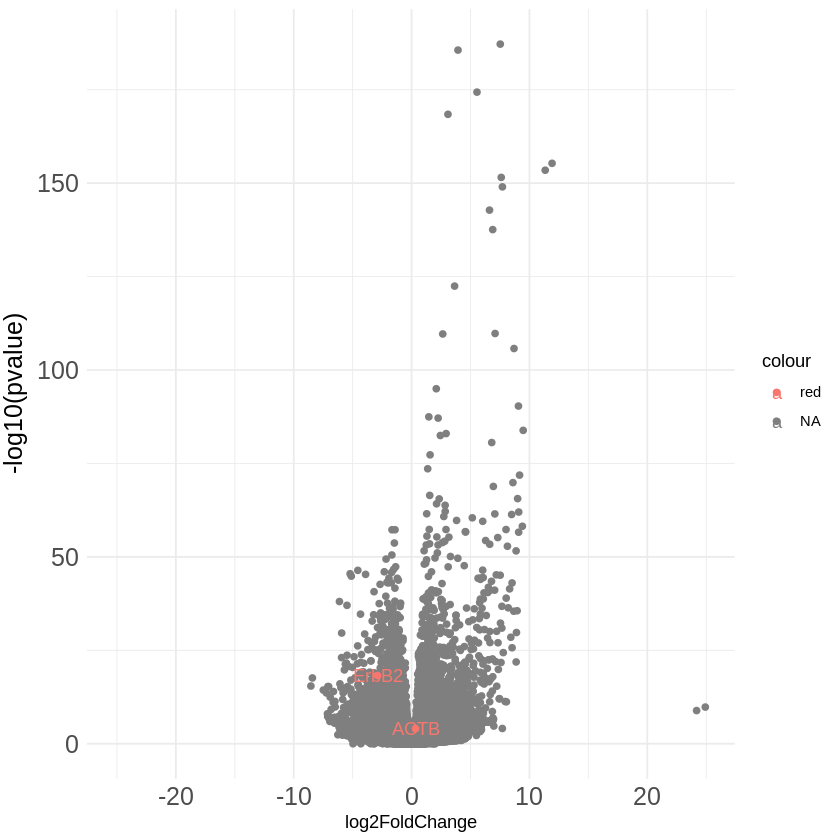

In [81]:
res_plot <- resd %>% mutate(threshold = padj < 0.01)
res_plot <- res_plot %>% arrange(label)

g <- ggplot(data=res_plot, aes(x=log2FoldChange, y=-log10(pvalue), col=colour, label=label)) + 
        geom_point() + 
        theme_minimal() +
        geom_text() +
        theme(axis.title.y = element_text(vjust = 2, size = 15), axis.text.y = element_text(size = 15),
          axis.text.x = element_text(size = 15))
g

In [84]:
#write_csv(resd, "./DE_MCF7_vs_BT474_kallisto_sc_optimal_parameters.csv")

In [83]:
resd

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,label,color,colour
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000000003,52.19763356,1.95308124,0.26813751,51.76914465,6.242516e-13,9.308740e-12,,,NA
ENSG00000000005,0.00000000,NA,NA,NA,NA,NA,,,NA
ENSG00000000419,158.12769283,-0.62444798,0.08311979,54.97704190,1.219460e-13,1.968133e-12,,,NA
ENSG00000000457,28.55637336,-1.47310971,0.23933674,34.38355298,4.525312e-09,4.020351e-08,,,NA
ENSG00000000460,44.35010394,-1.12373103,0.30970898,12.44385095,4.193702e-04,1.548672e-03,,,NA
ENSG00000000938,0.00000000,NA,NA,NA,NA,NA,,,NA
ENSG00000000971,0.07156907,-0.71739092,1.70804637,0.51431284,4.732778e-01,NA,,,NA
ENSG00000001036,197.36442264,1.95332071,0.16616392,134.75464073,3.735981e-31,2.731223e-29,,,NA
ENSG00000001084,11.07534144,0.04150296,0.30453022,0.03766827,8.461108e-01,8.773333e-01,,,NA


In [31]:
cols <- c("SYMBOL", "GENENAME")
resd["geneid"] = rownames(resd)
resd <- left_join(resd, select(org.Hs.eg.db, keys=rownames(resd), columns=cols, keytype="ENSEMBL"), by=c("geneid"="ENSEMBL"))
resd <- resd[,-(7:9)]
#resd[,c(7:9,1:6,10:)]

'select()' returned 1:many mapping between keys and columns



In [32]:
#write_csv(resd[,c(7:9,1:6)], "./DE_MCF7_vs_BT474_kallisto.csv")

In [33]:
resd

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,geneid,SYMBOL,GENENAME
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
52.19763356,1.95307826,0.26820484,51.74299205,6.326222e-13,1.032485e-11,ENSG00000000003,TSPAN6,tetraspanin 6
0.00000000,NA,NA,NA,NA,NA,ENSG00000000005,TNMD,tenomodulin
158.12769283,-0.62448252,0.08305784,55.06503790,1.166067e-13,2.068516e-12,ENSG00000000419,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic"
28.55637336,-1.47313649,0.23930409,34.39408130,4.500899e-09,4.365435e-08,ENSG00000000457,SCYL3,SCY1 like pseudokinase 3
44.35010394,-1.12371320,0.30980486,12.43580688,4.211803e-04,1.688012e-03,ENSG00000000460,C1orf112,chromosome 1 open reading frame 112
0.00000000,NA,NA,NA,NA,NA,ENSG00000000938,FGR,"FGR proto-oncogene, Src family tyrosine kinase"
0.07156907,-1.61285939,1.91480583,0.77259638,3.794150e-01,5.094565e-01,ENSG00000000971,CFH,complement factor H
197.36442264,1.95331857,0.16618203,134.72496640,3.792237e-31,3.011734e-29,ENSG00000001036,FUCA2,alpha-L-fucosidase 2
11.07534144,0.04149972,0.30440917,0.03771283,8.460209e-01,8.763103e-01,ENSG00000001084,GCLC,glutamate-cysteine ligase catalytic subunit
